In [2]:
import pandas as pd

In [3]:
fn = '/media/sf_p4t_docs/pyalgo/dados/ITUB4_daily.csv'

In [71]:
%%time
data = pd.read_csv(fn, index_col=['datetime'], parse_dates=True)

CPU times: user 10.6 ms, sys: 2.71 ms, total: 13.3 ms
Wall time: 14.3 ms


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2919 entries, 2010-01-04 to 2021-10-19
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         2919 non-null   int64  
 1   open         2919 non-null   float64
 2   high         2919 non-null   float64
 3   low          2919 non-null   float64
 4   close        2919 non-null   float64
 5   tick_volume  2919 non-null   int64  
 6   spread       2919 non-null   int64  
 7   real_volume  2919 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 205.2 KB


In [6]:
data.tail()

,time,open,high,low,close,tick_volume,spread,real_volume
datetime,,,,,,,,
2021-10-13,1634083200,24.30,24.45,23.78,24.15,70013,0,42242200
2021-10-14,1634169600,24.43,24.61,23.84,24.05,55243,0,36886900
2021-10-15,1634256000,24.22,24.87,24.08,24.66,72952,0,52518600
2021-10-18,1634515200,24.58,25.05,24.37,24.90,46642,0,28716800
2021-10-19,1634601600,24.70,24.79,24.17,24.35,88919,0,42116700


In [7]:
data['close'].mean()

20.041853374443296

Strategy Based on SMA

In [11]:
data = pd.DataFrame(data['close'])

In [12]:
data['SMA1'] = data['close'].rolling(42).mean()

In [14]:
data['SMA2'] = data['close'].rolling(252).mean()

In [15]:
data.tail()

,close,SMA1,SMA2
datetime,,,
2021-10-13,24.15,28.621667,28.736429
2021-10-14,24.05,28.459048,28.741310
2021-10-15,24.66,28.318095,28.749167
2021-10-18,24.90,28.194524,28.752421
2021-10-19,24.35,28.052857,28.753770


In [16]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

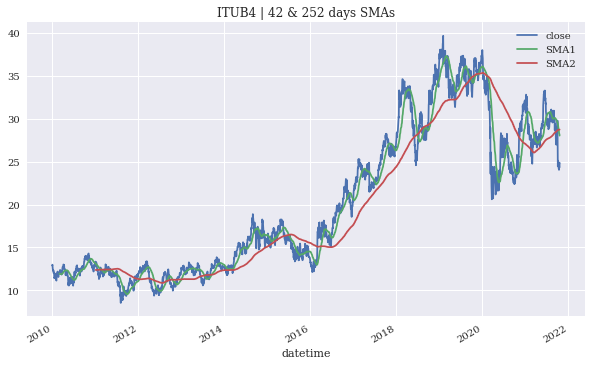

In [17]:
data.plot(title='ITUB4 | 42 & 252 days SMAs',
figsize=(10, 6));

In [18]:
import numpy as np

In [19]:
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

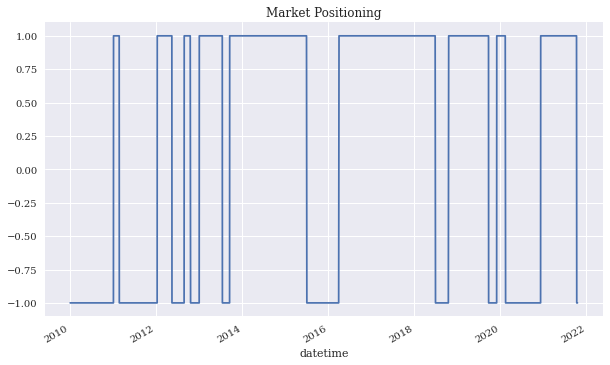

In [20]:
data['position'].plot(ylim=[-1.1, 1.1], title='Market Positioning', figsize=(10, 6));

In [21]:
data['returns'] = np.log(data['close'] / data['close'].shift(1))

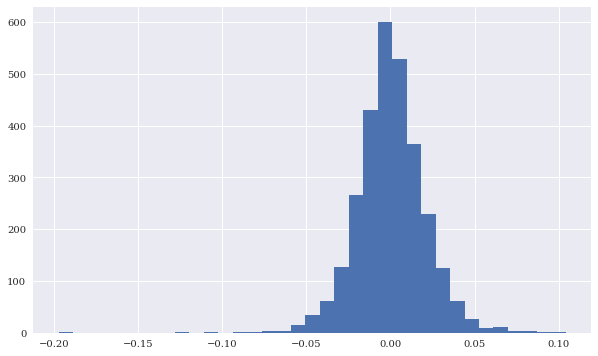

In [22]:
data['returns'].hist(bins=35, figsize=(10, 6));

In [23]:
data['strategy'] = data['position'].shift(1) * data['returns']

In [24]:
data[['returns', 'strategy']].sum()

returns     0.63608
strategy   -0.78954
dtype: float64

In [25]:
data[['returns', 'strategy']].sum().apply(np.exp)

returns     1.889061
strategy    0.454054
dtype: float64

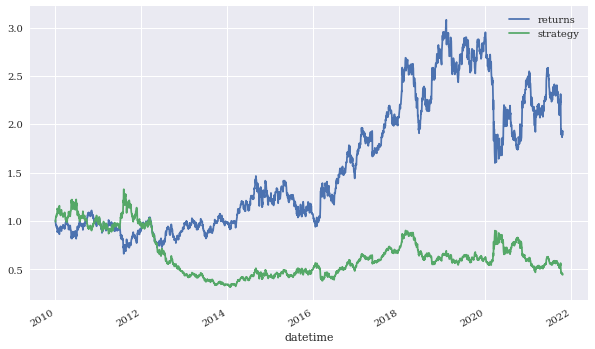

In [27]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [28]:
data[['returns', 'strategy']].mean() * 252

returns     0.054932
strategy   -0.068185
dtype: float64

In [29]:
np.exp(data[['returns', 'strategy']].mean() * 252) - 1

returns     0.056469
strategy   -0.065912
dtype: float64

In [31]:
data[['returns', 'strategy']].std() * 252 ** 0.5

returns     0.329368
strategy    0.329359
dtype: float64

In [33]:
(data[['returns', 'strategy']].apply(np.exp) - 1).std() * 252 ** 0.5

returns     0.32868
strategy    0.32836
dtype: float64

In [34]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)

In [35]:
data['cummax'] = data['cumret'].cummax()

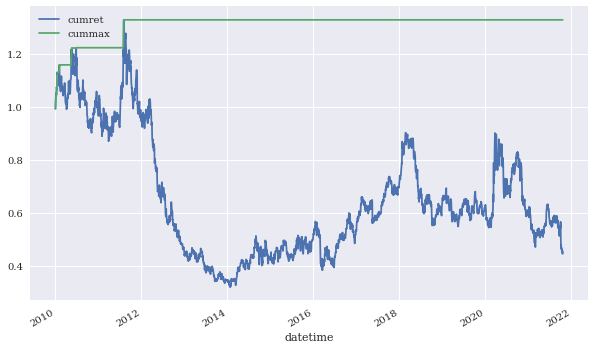

In [36]:
data[['cumret', 'cummax']].dropna().plot(figsize=(10, 6));

In [37]:
drawdown = data['cummax'] - data['cumret']

In [38]:
drawdown.max()

1.0091001986902757

In [39]:
temp = drawdown[drawdown == 0]

In [40]:
periods = (temp.index[1:].to_pydatetime() - 
           temp.index[:-1].to_pydatetime())

In [41]:
periods[12:15]

array([datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=5)], dtype=object)

In [42]:
periods.max()

datetime.timedelta(days=404)

Strategy Based on Momentum

In [46]:
data = pd.DataFrame(data['close'])

In [48]:
data['returns'] = np.log(data['close'] / data['close'].shift(1))

In [49]:
data['position'] = np.sign(data['returns'])

In [50]:
data['strategy'] = data['position'].shift(1) * data['returns']

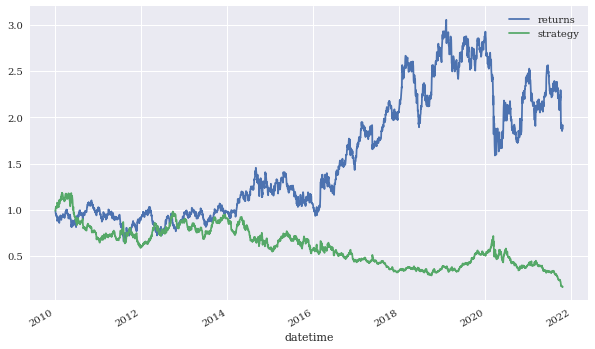

In [53]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

In [62]:
data['position'] = np.sign(data['returns'].rolling(2).mean())

In [63]:
data['strategy'] = data['position'].shift(1) * data['returns']

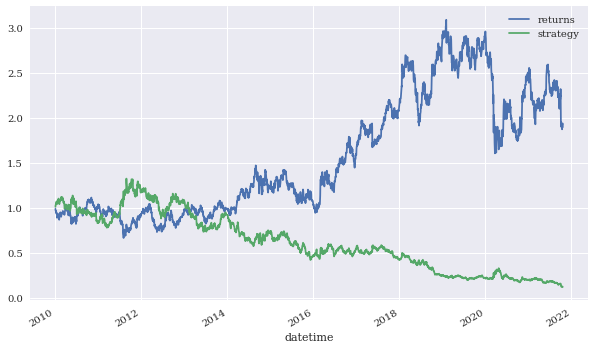

In [64]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

In [76]:
fn = '/media/sf_p4t_docs/pyalgo/dados/ITUB4_intraday_mt5timeframe_5.csv'

In [77]:
%%time
data = pd.read_csv(fn, index_col=['datetime'], parse_dates=True)

CPU times: user 220 ms, sys: 30.2 ms, total: 250 ms
Wall time: 1.07 s


In [83]:
data = pd.DataFrame(data['close'])
data['returns'] = np.log(data['close'] / 
                         data['close'].shift(1))

In [79]:
to_plot = ['returns']

In [80]:
for m in [1, 3, 5, 7, 9]:
    data['position_%d' % m] = np.sign(data['returns'].rolling(m).mean())
    data['strategy_%d' % m] = (data['position_%d' % m].shift(1) *
                               data['returns'])
    to_plot.append('strategy_%d' % m)
    

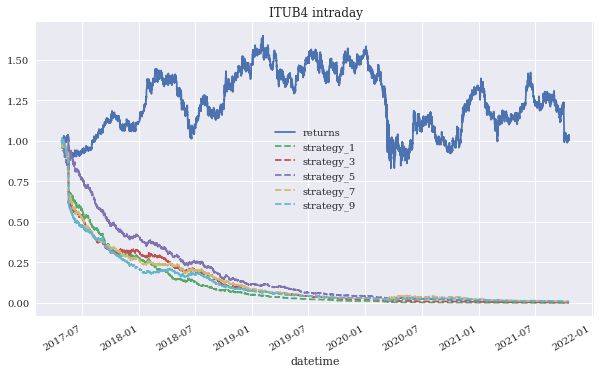

In [81]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(
    title='ITUB4 intraday',
    figsize=(10, 6), style=['-', '--', '--', '--', '--', '--']);

Strategy Based on Mean Reversion

In [85]:
data = pd.DataFrame(data['close'])

In [86]:
data['returns'] = np.log(data['close'] / 
                         data['close'].shift(1))
SMA = 25

In [87]:
data['SMA'] = data['close'].rolling(SMA).mean()

In [95]:
threshold = 0.8

In [96]:
data['distance'] = data['close'] - data['SMA']

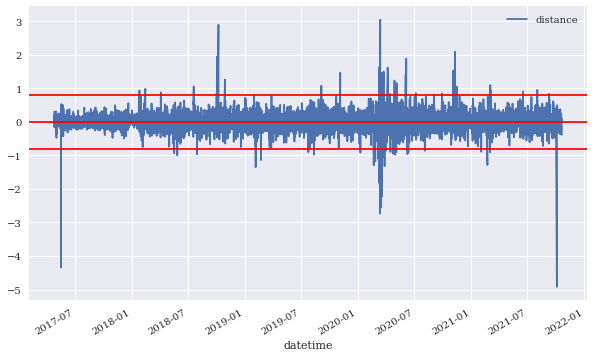

In [97]:
data['distance'].dropna().plot(figsize=(10, 6), legend=True)
plt.axhline(threshold, color='r')
plt.axhline(-threshold, color='r')
plt.axhline(0, color='r');

In [98]:
data['position'] = np.where(data['distance'] > threshold, -1, np.nan)
data['position'] = np.where(data['distance'] < -threshold, 1, data['position'])
data['position'] = np.where(data['distance'] * data['distance'].shift(1) < 0, 0, data['position'])

In [99]:
data['position'] = data['position'].ffill().fillna(0)

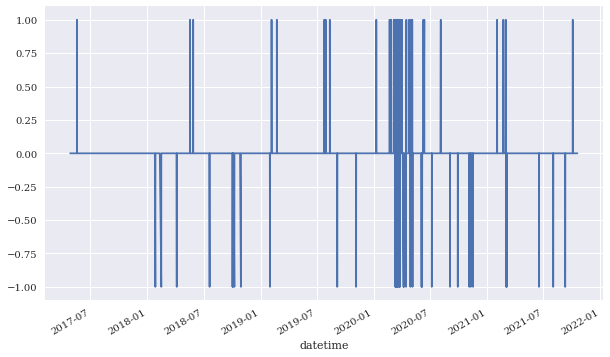

In [100]:
data['position'].iloc[SMA:].plot(ylim=[-1.1, 1.1],
figsize=(10, 6));

In [101]:
data['strategy'] = data['position'].shift(1) * data['returns']

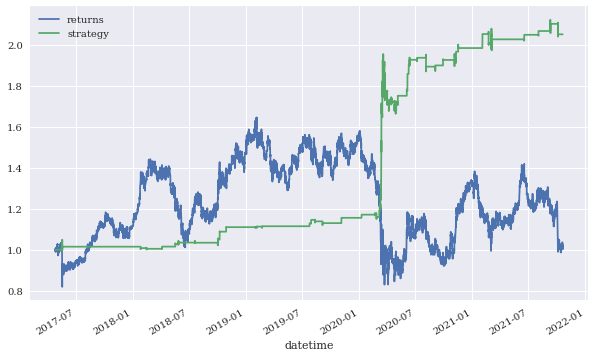

In [102]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));